# Testing models on images with drainage systems

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [1]:
from helper.models.config import *
from helper.models.nvidia_ade20k import *
from helper.models.unet import *
from helper.models.deeplab_mobilenet import *
from helper.data.dataobj import DrainageDataset
from torch.utils.data import DataLoader
from helper.data.dataobj import DrainageDataset
from sklearn.model_selection import train_test_split
from helper.utilities import *
from helper.callbacks.logs import save_history_callback, save_resulting_callback
from helper.callbacks.visualize import *
import numpy as np

In [2]:
images = np.load('../helper/data/datasets/new_images.npy').astype(np.uint8)
masks = np.load('../helper/data/datasets/new_masks.npy')
print('loaded data')

loaded data


In [3]:
device='cuda'
test_ratio = 0.1
bins = [get_bin(mask) for mask in masks]
train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=test_ratio, stratify=bins, random_state=42)

nonzero_images = []
nonzero_masks = []

for i in range(len(test_images)):
    if calculate_mask_percentage(test_masks[i]) > 0:
        nonzero_images.append(test_images[i])
        nonzero_masks.append(test_masks[i])
dataset = DrainageDataset(nonzero_images, nonzero_masks, device=device)
test_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

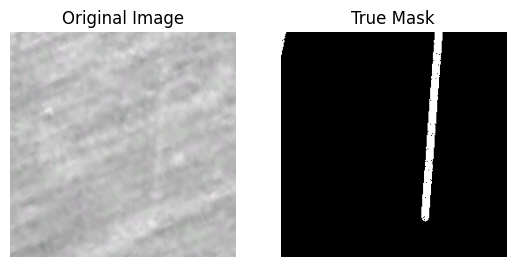

In [23]:
dataset.show(17, processed=False)

In [55]:
model = UNet(device=device)
model.load('./helper/models/saved/UNet-2.pt')
model.set_counter(50)
config = Config(
    model=model,
    num_epochs=200,
    lr=1e-4
)
details = model.test_epoch(test_dataloader, config.criterion, device='cuda', detailed=True)

Initialized UNet


In [56]:
print(details)

{'loss': 0.09302489921639237, 'acc': 0.9869258403778076, 'prec': 0.9230774641036987, 'recall': 0.699044406414032, 'f1': 0.7955785989761353, 'dice': 0.714961051940918, 'iou': 0.6605556607246399}
